In [1]:
from bs4 import BeautifulSoup
import requests
import os
# https://data.binance.vision/?prefix=data/spot/monthly/klines/
# https://github.com/binance/binance-public-data

In [6]:
url = "https://data.binance.vision/?prefix=data/spot/monthly/klines/1INCHBTC/1m/"

with open("/home/ema/dev/shocks/data/binance_pairs.html") as file:
    soup = BeautifulSoup(file)

In [7]:
pairs = []
for pair in soup.find_all("a")[1: ]:
    pairs.append(pair.text.replace("/", ""))

def download_data(data_path, pair, months, freq="1m"):
    for month in months:
        pair_dir = os.path.join(DATA_PATH, pair)
        if not os.path.isdir(pair_dir):
            os.mkdir(pair_dir)

        url = f"https://data.binance.vision/data/spot/monthly/klines/{pair}/{freq}/{pair}-{freq}-{month}.zip"
        os.system(f" cd {pair_dir} && wget {url}")
 

In [ ]:
months = [
    "2021-10",
    "2021-11",
    "2021-12",
    "2022-01",
    "2022-02",
    "2022-03",
]

freq = "1m"
DATA_PATH ="/home/ema/dev/shocks/shocks/data/binance/"
selected_pairs = ("BTCUSDT", "BNBBTC", "AVAXBTC", "JOEBTC", "AXSTRY", "CAKEBRL")


for pair in selected_pairs:
    download_data(data_path=DATA_PATH, pair=pair, months=months, freq="1m")

In [2]:
from shocks.dataset import Dataset
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams["figure.figsize"] = (20,15)

data = Dataset(pair="AVAXBTC")
data.preprocess(freq="1m")

[{'duration': Timedelta('0 days 00:05:00'),
  'end': Timestamp('2021-10-01 10:50:00'),
  'start': Timestamp('2021-10-01 10:45:00')},
 {'duration': Timedelta('0 days 00:02:00'),
  'end': Timestamp('2021-10-01 12:39:00'),
  'start': Timestamp('2021-10-01 12:37:00')},
 {'duration': Timedelta('0 days 00:03:00'),
  'end': Timestamp('2021-10-01 22:13:00'),
  'start': Timestamp('2021-10-01 22:10:00')},
 {'duration': Timedelta('0 days 00:10:00'),
  'end': Timestamp('2021-10-02 13:52:00'),
  'start': Timestamp('2021-10-02 13:42:00')},
 {'duration': Timedelta('0 days 00:04:00'),
  'end': Timestamp('2021-10-02 15:43:00'),
  'start': Timestamp('2021-10-02 15:39:00')},
 {'duration': Timedelta('0 days 00:11:00'),
  'end': Timestamp('2021-10-02 16:19:00'),
  'start': Timestamp('2021-10-02 16:08:00')},
 {'duration': Timedelta('0 days 00:12:00'),
  'end': Timestamp('2021-10-02 23:39:00'),
  'start': Timestamp('2021-10-02 23:27:00')},
 {'duration': Timedelta('0 days 00:02:00'),
  'end': Timestamp('2021-

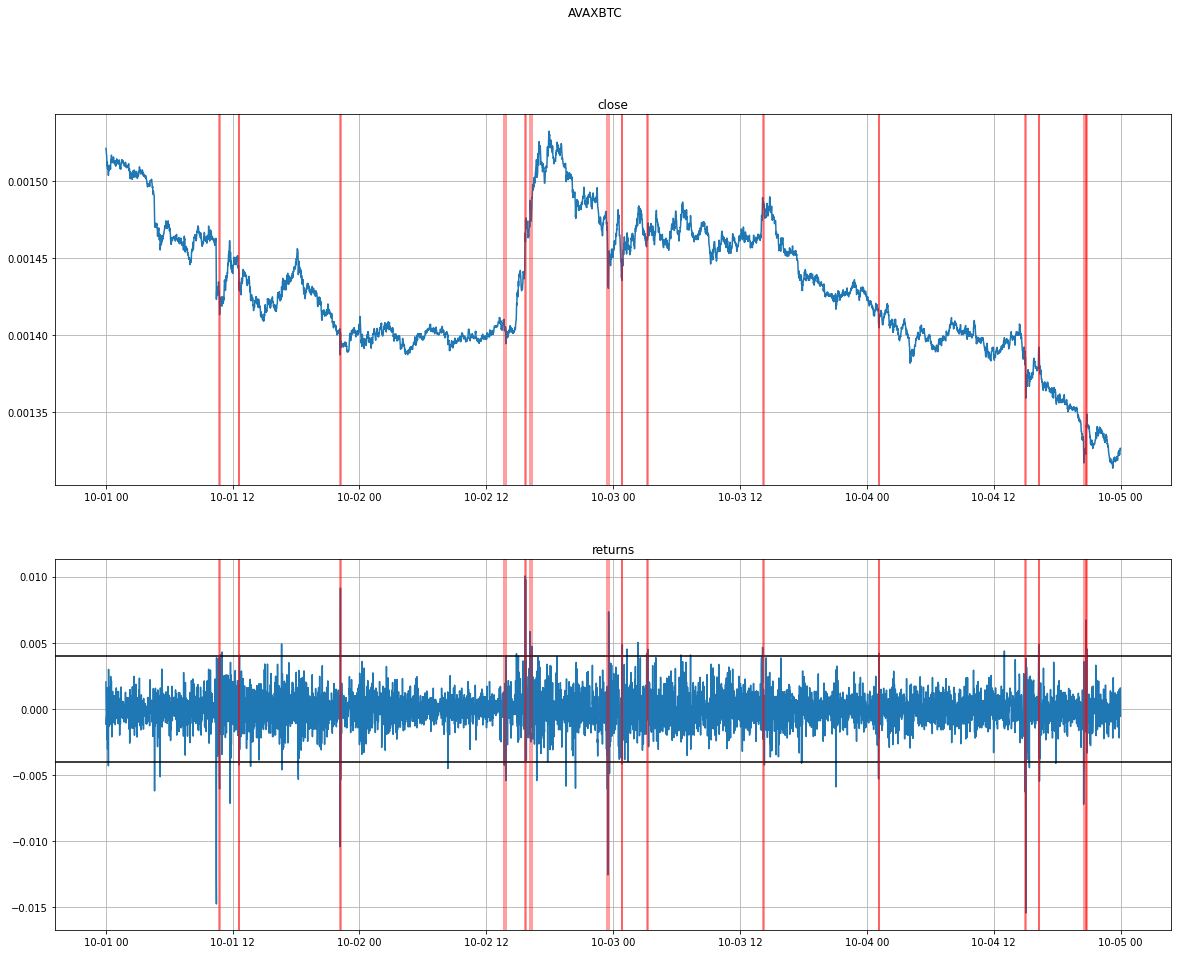

In [4]:
data.find_shocks(start_date="2021-10-01", end_date="2021-10-05", plot=True)
from pprint import pprint
pprint(data.shocks)

In [48]:
import matplotlib.dates as mdates
def plot(df, shocks=None, cols = ["returns", "close"]):
    fig, axs = plt.subplots(len(cols))
    fig.suptitle('BTC/USD')
    df = df.dropna()
    for idx, key in enumerate(cols):
        axs[idx].plot(df[key])
        axs[idx].set_title(key)
        axs[idx].grid(True)
    
        if shocks is not None:
            #trans = axs.get_xaxis_transform()
            for i, shock in enumerate(shocks):
                axs[idx].axvline(shock["start"], alpha=0.5, color="red")
                axs[idx].axvline(shock["end"], alpha=0.5, color="red")
                label_position = 0.5 if i%2 == 0 else -0.5
                #plt.text(shock["start"], label_position, s="diocane")#, str(shock["duration"]))
    plt.show()



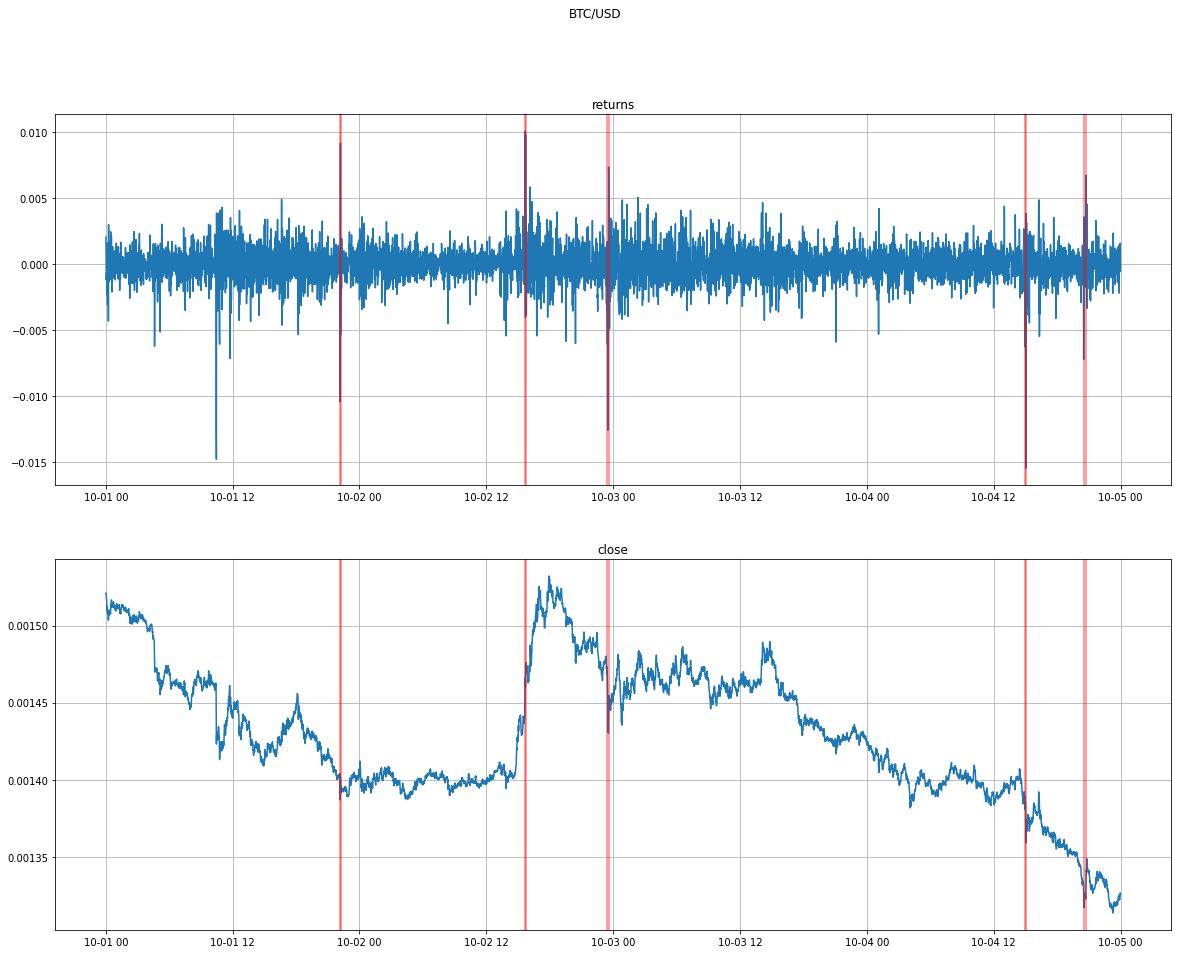

[{'duration': Timedelta('0 days 00:03:00'),
  'end': Timestamp('2021-10-01 22:13:00'),
  'start': Timestamp('2021-10-01 22:10:00')},
 {'duration': Timedelta('0 days 00:04:00'),
  'end': Timestamp('2021-10-02 15:43:00'),
  'start': Timestamp('2021-10-02 15:39:00')},
 {'duration': Timedelta('0 days 00:08:00'),
  'end': Timestamp('2021-10-02 23:35:00'),
  'start': Timestamp('2021-10-02 23:27:00')},
 {'duration': Timedelta('0 days 00:05:00'),
  'end': Timestamp('2021-10-04 15:02:00'),
  'start': Timestamp('2021-10-04 14:57:00')},
 {'duration': Timedelta('0 days 00:13:00'),
  'end': Timestamp('2021-10-04 20:43:00'),
  'start': Timestamp('2021-10-04 20:30:00')}]


In [51]:
cols = ["returns", "close"]
df = Dataset.filter_data(df=data.data.dropna(),start_date="2021-10-01", end_date="2021-10-05")
plot(df, data.shocks)
